# Glovers tight bounds examination

import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

read in dataframe using python's pickle 

In [2]:
df = pd.read_pickle("dataframe.pkl")
print(df)

    solver type  symmetric  method glover_bounds  options  size  density  \
0    cplex  QKP       True  glover      original        0    75       50   
1    cplex  QKP       True  glover      original        1    75       50   
2    cplex  QKP       True  glover      original        2    75       50   
3    cplex  QKP       True  glover      original        3    75       50   
4    cplex  QKP       True  glover         tight        0    75       50   
5    cplex  QKP       True  glover         tight        1    75       50   
6    cplex  QKP       True  glover         tight        2    75       50   
7    cplex  QKP       True  glover         tight        3    75       50   
8   gurobi  QKP       True  glover      original        0    75       50   
9   gurobi  QKP       True  glover      original        1    75       50   
10  gurobi  QKP       True  glover      original        2    75       50   
11  gurobi  QKP       True  glover      original        3    75       50   
12  gurobi  

get rows corresponding to original glovers bounds and tight glovers bounds 

In [3]:
org_bounds = df[df["glover_bounds"]=="original"]
tight_bounds = df[df["glover_bounds"]=="tight"]

get avg solve times assossiated with each row and sort the resulting pandas Series's

In [4]:
org_bounds_times = org_bounds["avg_total_time"]
sorted_org = org_bounds_times.sort_values()
tight_bounds_times = tight_bounds["avg_total_time"]
sorted_tight = tight_bounds_times.sort_values()

plot the times for each set of bounds, in ascending order

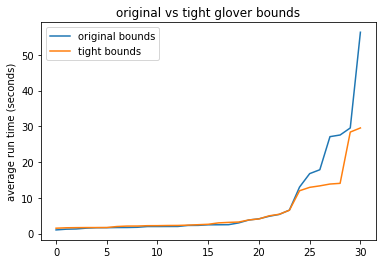

In [5]:
plt.plot(sorted_org.values[1:32], label="original bounds")
plt.plot(sorted_tight.values[1:32], label="tight bounds")
plt.ylabel("average run time (seconds)")
plt.title("original vs tight glover bounds")
plt.legend()
plt.show()

# now lets compare the 2 solvers. cplex vs gurobi

In [6]:
cplex = df[df["solver"]=="cplex"]
gurobi = df[df["solver"]=="gurobi"]
cplex_solve_times = cplex["avg_total_time"]
sorted_cplex = cplex_solve_times.sort_values()
gurobi_solve_times = gurobi["avg_total_time"]
sorted_gurobi = gurobi_solve_times.sort_values()

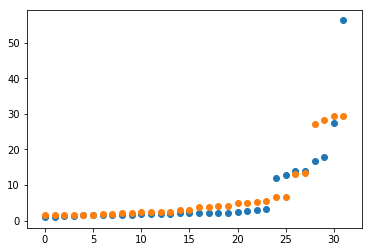

In [7]:
plt.scatter(range(32),sorted_cplex.values)
plt.scatter(range(32),sorted_gurobi.values)
plt.show()

In [8]:
df = pd.read_pickle("density_compare.pkl")
print(df)

   solver type  symmetric method glover_bounds  options  size  density  \
0   cplex  QKP      False    std         tight        0     5       25   
1   cplex  QKP      False    std         tight        0     5       50   
2   cplex  QKP      False    std         tight        0     5       75   
3   cplex  QKP      False    std         tight        0     5      100   
4   cplex  QKP      False    std         tight        0    10       25   
5   cplex  QKP      False    std         tight        0    10       50   
6   cplex  QKP      False    std         tight        0    10       75   
7   cplex  QKP      False    std         tight        0    10      100   
8   cplex  QKP      False    std         tight        0    15       25   
9   cplex  QKP      False    std         tight        0    15       50   
10  cplex  QKP      False    std         tight        0    15       75   
11  cplex  QKP      False    std         tight        0    15      100   
12  cplex  QKP      False    std      

In [11]:
dense100 = df[df["density"]==100]
dense75 = df[df["density"]==75]
dense50 = df[df["density"]==50]
dense25 = df[df["density"]==25]

In [15]:
sizes100 = dense100["size"]
sizes75 = dense75["size"]
sizes50 = dense50["size"]
sizes25 = dense25["size"]

In [17]:
times100 = dense100["avg_total_time"]
times75 = dense75["avg_total_time"]
times50 = dense50["avg_total_time"]
times25 = dense25["avg_total_time"]

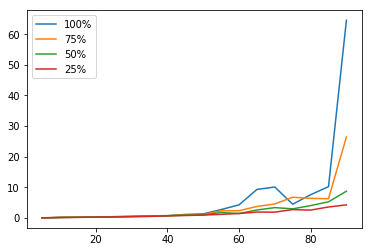

In [28]:
plt.plot(sizes100, times100, label="100%")
plt.plot(sizes75, times75, label="75%")
plt.plot(sizes50, times50, label="50%")
plt.plot(sizes25, times25, label="25%")
plt.legend()
plt.show()